## AIVLE School [AI 미니프로젝트] '서울시 생활정보 기반 대중교통 수요 분석'<br>

### 미니프로젝트 안내
* 미션: 버스 노선 추가가 필요한 서울시 내 자치구 선정
* 방법: 1부터 4까지의 ipynb 파일 순서대로 진행하며 데이터 불러오기 및 분석(EDA)을 수행하여 서울시 내 자치구별 정보를 도출하고<br> 이를 바탕으로 5. 데이터 분석에서 버스 노선 추가가 필요한 서울시 내 자치구를 선정해봅니다.<br><br>
* 1. 구별 버스정류장 분석.ipynb<br>
-- 1.1 bus_station_boarding.csv 파일을 활용하여 <span style="color:blue">서울시 내 각 구별 정류장, 노선수, 승하차 고객수를 분석</span>합니다.<br>
  그런데 bus_station_boarding.csv 파일에는 서울시와 경기도의 버스정류장이 모두 포함되어 있기 때문에<br>
  1.2 bus_station_seoul.csv의 정보를 추가로 활용하여 서울시 정류장만 골라내어 분석 대상에 포함시킵니다.<br><br>
* 2. 구별 이동인구 분석.ipynb<br>
-- 2. seoul_moving.csv 파일을 활용하여 <span style="color:blue">서울시 내 구별 이동 시간과 이동 인구를 분석</span>합니다.<br><br>
* 3. 구별 등록인구 분석.ipynb<br>
-- 3. seoul_people.csv 파일을 활용하여 <span style="color:blue">서울시 내 구별 등록인구를 분석</span>합니다. <br><br>
* 4. 구별 업종 분석.ipynb<br>
-- 4. business_type.csv 파일을 활용하여 <span style="color:blue">서울시 내 구별 등록업종을 분석</span>합니다.<br><br>
* 5. 데이터 분석.ipynb<br>
-- 위 1~4에서 도출한 데이터 프레임을 합쳐서 <span style="color:blue">서울시 내 어느 구에 버스 노선을 추가해야 할 지</span> 가설 수립 및 검증 과정을 거쳐 분석합니다.<br> (y값은 정류장 수 또는 노선 수)

---

# 1. 버스정류장 분석
### 버스정류장 데이터를 활용하여 서울시 내 각 구별 정류장 수, 노선 수, 승하차 고객수를 분석합니다.
### 이때, 서울시가 아닌 정류장 정보가 포함되어 있다면 이 정류장들을 제거하고 분석해야 합니다.

In [1]:
# 필요 라이브러리를 설치합니다.
%pip install pandas seaborn

Note: you may need to restart the kernel to use updated packages.


## 데이터 안내

[기본 데이터]
* 1.1 bus_station_boarding.csv 
* 서울시 버스노선별 정류장별 승하차 인원 정보
* https://data.seoul.go.kr/dataList/OA-12912/S/1/datasetView.do


[추가 데이터]
* 1.1 bus_station_seoul.csv
* 서울시 버스정류장 위치정보
* https://data.seoul.go.kr/dataList/OA-15067/S/1/datasetView.do

---

# 1.1. 데이터 불러오기

#### [1.1.1] 데이터 로딩
* Pandas 라이브러리를 활용해서 '1.1 bus_station_boarding.csv'파일을 'bus_station' 변수에 저장하세요.
    * 데이터 파일 로딩시 참고 사항 
        * 구분자(sep)는 ',' 입니다
        * cp949 인코더를 사용해 주세요
    * 데이터를 불러올 때 오류가 발생한다면, 오류에 대해 직접 검색하여 해결해보세요.

In [2]:
import sys
import numpy as np
import pandas as pd

In [3]:
# 아래에 코드를 작성하고 결과를 확인합니다.

bus_station = pd.read_csv('./bus_station_boarding.csv', decimal=',', encoding='cp949')
bus_station.head()

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자
0,20220401,2112,2112번(면목동~성북동),06243,장안동삼성쉐르빌아파트,31,156,20220404
1,20220401,2112,2112번(면목동~성북동),06242,새서울병원,46,153,20220404
2,20220401,2112,2112번(면목동~성북동),06238,장안동근린공원,11,80,20220404
3,20220401,2112,2112번(면목동~성북동),06309,휘경공고휘경주공아파트,56,65,20220404
4,20220401,100,100번(하계동~용산구청),11428,한성여객종점,9,5,20220404


In [4]:
# 데이터 프레임의 Shape을 확인합니다.
bus_station.shape

(1169878, 8)

---

# 1.2. 기본 정보 확인 및 클렌징

+ 데이터 클렌징 : 결측치, 이상치 등을 제거하여 데이터 분석 결과가 왜곡 되는 문제를 방지하기 위한 정제 과정

#### [1.2.1] 기본 정보 확인하기
* 'bus_station' 데이터의 정보를 확인해보세요.
* 'describe', 'info', 'head', 'tail' 등 전부 활용해 보세요.
* 데이터 중에서 컬럼명으로 봤을 때 int 이어야 할 것 같은데 object인 컬럼들이 있습니다. 왜 그런지 이 컬럼들을 더 분석해보세요.

In [5]:
# 아래에 코드를 작성하고 결과를 확인합니다.
bus_station

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자
0,20220401,2112,2112번(면목동~성북동),06243,장안동삼성쉐르빌아파트,31,156,20220404
1,20220401,2112,2112번(면목동~성북동),06242,새서울병원,46,153,20220404
2,20220401,2112,2112번(면목동~성북동),06238,장안동근린공원,11,80,20220404
3,20220401,2112,2112번(면목동~성북동),06309,휘경공고휘경주공아파트,56,65,20220404
4,20220401,100,100번(하계동~용산구청),11428,한성여객종점,9,5,20220404
...,...,...,...,...,...,...,...,...
1169873,20220430,7738,7738번(은평공영차고지~홍제역),12004,수색교,2,32,20220503
1169874,20220430,201,201번(구리~서울역),06278,세종대왕기념관,153,43,20220503
1169875,20220430,강서01,강서01(약수터~등촌역),16555,화곡본동시장,133,6,20220503
1169876,20220430,3321,3321번(강동차고지~강동구청),25236,굽은다리사거리,36,41,20220503


In [6]:
# 아래에 코드를 작성하고 결과를 확인합니다.
bus_station.head()

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자
0,20220401,2112,2112번(면목동~성북동),06243,장안동삼성쉐르빌아파트,31,156,20220404
1,20220401,2112,2112번(면목동~성북동),06242,새서울병원,46,153,20220404
2,20220401,2112,2112번(면목동~성북동),06238,장안동근린공원,11,80,20220404
3,20220401,2112,2112번(면목동~성북동),06309,휘경공고휘경주공아파트,56,65,20220404
4,20220401,100,100번(하계동~용산구청),11428,한성여객종점,9,5,20220404


In [7]:
# 아래에 코드를 작성하고 결과를 확인합니다.
bus_station.tail()

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자
1169873,20220430,7738,7738번(은평공영차고지~홍제역),12004,수색교,2,32,20220503
1169874,20220430,201,201번(구리~서울역),06278,세종대왕기념관,153,43,20220503
1169875,20220430,강서01,강서01(약수터~등촌역),16555,화곡본동시장,133,6,20220503
1169876,20220430,3321,3321번(강동차고지~강동구청),25236,굽은다리사거리,36,41,20220503
1169877,20220430,201,201번(구리~서울역),06280,영휘원사거리.(구)홍릉사거리,122,49,20220503


In [8]:
# 아래에 코드를 작성하고 결과를 확인합니다.
bus_station.describe()

,사용일자,승차총승객수,하차총승객수,등록일자
count,1.169878e+06,1.169878e+06,1.169878e+06,1.169878e+06
mean,2.022042e+07,1.108042e+02,1.082804e+02,2.022043e+07
std,8.661492e+00,1.554787e+02,1.420829e+02,2.667754e+01
min,2.022040e+07,0.000000e+00,0.000000e+00,2.022040e+07
25%,2.022041e+07,1.800000e+01,2.100000e+01,2.022041e+07
50%,2.022042e+07,6.300000e+01,6.800000e+01,2.022042e+07
75%,2.022042e+07,1.460000e+02,1.450000e+02,2.022043e+07
max,2.022043e+07,3.990000e+03,3.615000e+03,2.022050e+07


In [9]:
# 아래에 코드를 작성하고 결과를 확인합니다.
bus_station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1169878 entries, 0 to 1169877
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   사용일자        1169878 non-null  int64 
 1   노선번호        1169878 non-null  object
 2   노선명         1169878 non-null  object
 3   버스정류장ARS번호  1169878 non-null  object
 4   역명          1169878 non-null  object
 5   승차총승객수      1169878 non-null  int64 
 6   하차총승객수      1169878 non-null  int64 
 7   등록일자        1169878 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 71.4+ MB


#### [1.2.2] 버스정류장 위치를 구 별로 구분 하기

* tip! 버스정류장ARS번호의 앞 두자리가 구를 의미합니다.

* '자치구' column을 추가하여 정류장이 위치한 구 이름을 등록해주세요.


In [10]:
# 먼저, bus_station에서 버스정류장ARS번호의 정보를 확인해보세요.
bus_station['버스정류장ARS번호']

0          06243
1          06242
2          06238
3          06309
4          11428
           ...  
1169873    12004
1169874    06278
1169875    16555
1169876    25236
1169877    06280
Name: 버스정류장ARS번호, Length: 1169878, dtype: object

In [11]:
# 버스정류장 ARS 번호의 앞자리 2개를 잘라내어 새로 '자치구' 컬럼을 생성합니다
bus_station['자치구'] = bus_station['버스정류장ARS번호'].str.slice(0,2)
bus_station.head()

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자,자치구
0,20220401,2112,2112번(면목동~성북동),06243,장안동삼성쉐르빌아파트,31,156,20220404,06
1,20220401,2112,2112번(면목동~성북동),06242,새서울병원,46,153,20220404,06
2,20220401,2112,2112번(면목동~성북동),06238,장안동근린공원,11,80,20220404,06
3,20220401,2112,2112번(면목동~성북동),06309,휘경공고휘경주공아파트,56,65,20220404,06
4,20220401,100,100번(하계동~용산구청),11428,한성여객종점,9,5,20220404,11


In [12]:
# 자치구의 값들이 어떻게 구성되어 있는 지 확인해봅니다. (ex: unique 활용)
bus_station['자치구'].unique()

array(['06', '11', '09', '01', '14', '13', '04', '22', '38', '20', '21',
       '19', '18', '03', '02', '08', '17', '05', '10', '35', '12', '07',
       '68', '16', '~', '42', '49', '39', '15', '23', '44', '25', '24',
       '48', '36', '40', '57', '56', '28', '61', '63', '46', '45', '31',
       '30', '37', '60', '27', '47', '59'], dtype=object)

#### [1.2.3] 서울시 자치구에 해당하는 버스정류장만 추출하기

* 위에서 살펴본 자치구의 값은 숫자 2자리로 구성되어 있습니다. 
* 그런데 서울시 구별 코드정보는 01부터 25까지라고 합니다(도메인지식)
* 그렇다면 01부터 25의 범위를 넘어서는 데이터는 서울시 구별 정보가 아닐 것입니다. 이번 미니프로젝트에서는 서울시에 관한 정보만 분석하고자 하므로 이 데이터를 어떻게 처리하면 좋을지 생각하여 적용해보세요.
* 분석 시의 편의를 위해 숫자 2자리 구별 코드는 구 이름으로 변환해주세요.
* 서울시 구별 코드정보<br>
    '01': '종로구',
    '02': '중구',
    '03': '용산구',
    '04': '성동구',
    '05': '광진구',
    '06': '동대문구',
    '07': '중랑구',
    '08': '성북구',
    '09': '강북구',
    '10': '도봉구',
    '11': '노원구',
    '12': '은평구',
    '13': '서대문구',
    '14': '마포구',
    '15': '양천구',
    '16': '강서구',
    '17': '구로구',
    '18': '금천구',
    '19': '영등포구',
    '20': '동작구',
    '21': '관악구',
    '22': '서초구',
    '23': '강남구',
    '24': '송파구',
    '25': '강동구'

In [13]:
코드정보 = {'01': '종로구', '02': '중구', '03': '용산구', '04': '성동구', '05': '광진구', '06': '동대문구', '07': '중랑구', '08': '성북구', '09': '강북구', '10': '도봉구', '11': '노원구', '12': '은평구', '13': '서대문구', '14': '마포구', '15': '양천구', '16': '강서구', '17': '구로구', '18': '금천구', '19': '영등포구', '20': '동작구', '21': '관악구', '22': '서초구', '23': '강남구', '24': '송파구', '25': '강동구'}

In [14]:
# 숫자 2자리 구 코드를 구 이름으로 변환합니다
bus_station['자치구'] = bus_station['자치구'].map(코드정보)

In [15]:
# 숫자 2자리 구 코드를 구 이름으로 변환한 결과를 확인해봅니다.

bus_station.head()

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자,자치구
0,20220401,2112,2112번(면목동~성북동),06243,장안동삼성쉐르빌아파트,31,156,20220404,동대문구
1,20220401,2112,2112번(면목동~성북동),06242,새서울병원,46,153,20220404,동대문구
2,20220401,2112,2112번(면목동~성북동),06238,장안동근린공원,11,80,20220404,동대문구
3,20220401,2112,2112번(면목동~성북동),06309,휘경공고휘경주공아파트,56,65,20220404,동대문구
4,20220401,100,100번(하계동~용산구청),11428,한성여객종점,9,5,20220404,노원구


In [16]:
# 자치구 컬럼의 값들을 확인해봅니다.
bus_station['자치구'].value_counts(ascending=True)

자치구
광진구     23440
성동구     29158
강동구     29233
용산구     30386
금천구     30680
도봉구     31042
중구      31207
강북구     36274
동대문구    39749
양천구     41174
구로구     41449
종로구     41473
동작구     42905
중랑구     44689
영등포구    47788
은평구     48890
노원구     49263
송파구     49394
마포구     49660
관악구     49771
성북구     50749
강서구     53122
서대문구    53526
서초구     57001
강남구     62571
Name: count, dtype: int64

In [17]:
bus_station['자치구'].unique()

array(['동대문구', '노원구', '강북구', '종로구', '마포구', '서대문구', '성동구', '서초구', nan,
       '동작구', '관악구', '영등포구', '금천구', '용산구', '중구', '성북구', '구로구', '광진구',
       '도봉구', '은평구', '중랑구', '강서구', '양천구', '강남구', '강동구', '송파구'],
      dtype=object)

In [18]:
bus_station

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자,자치구
0,20220401,2112,2112번(면목동~성북동),06243,장안동삼성쉐르빌아파트,31,156,20220404,동대문구
1,20220401,2112,2112번(면목동~성북동),06242,새서울병원,46,153,20220404,동대문구
2,20220401,2112,2112번(면목동~성북동),06238,장안동근린공원,11,80,20220404,동대문구
3,20220401,2112,2112번(면목동~성북동),06309,휘경공고휘경주공아파트,56,65,20220404,동대문구
4,20220401,100,100번(하계동~용산구청),11428,한성여객종점,9,5,20220404,노원구
...,...,...,...,...,...,...,...,...,...
1169873,20220430,7738,7738번(은평공영차고지~홍제역),12004,수색교,2,32,20220503,은평구
1169874,20220430,201,201번(구리~서울역),06278,세종대왕기념관,153,43,20220503,동대문구
1169875,20220430,강서01,강서01(약수터~등촌역),16555,화곡본동시장,133,6,20220503,강서구
1169876,20220430,3321,3321번(강동차고지~강동구청),25236,굽은다리사거리,36,41,20220503,강동구


#### [1.2.4] 결측치 처리

In [19]:
# NaN 값을 제거 합니다.
# 또는 위에서 처리한 방식에 따라 NaN 값이 없는 경우는 자치구 명으로 변환되지 않은 행(서울시 자치구에 해당하지 않는 정보)을 제거합니다
bus_station = bus_station.dropna(axis=0)

In [20]:
# NaN 값을 제거한 결과를 확인해봅니다. 결측치가 제가된 만큼 컬럼 갯수가 줄어들었는 지 확인해봅니다.
bus_station['자치구'].unique()

array(['동대문구', '노원구', '강북구', '종로구', '마포구', '서대문구', '성동구', '서초구', '동작구',
       '관악구', '영등포구', '금천구', '용산구', '중구', '성북구', '구로구', '광진구', '도봉구',
       '은평구', '중랑구', '강서구', '양천구', '강남구', '강동구', '송파구'], dtype=object)

In [21]:
bus_station.describe()

,사용일자,승차총승객수,하차총승객수,등록일자
count,1.064594e+06,1.064594e+06,1.064594e+06,1.064594e+06
mean,2.022042e+07,1.154652e+02,1.128579e+02,2.022043e+07
std,8.662137e+00,1.589672e+02,1.455026e+02,2.668863e+01
min,2.022040e+07,0.000000e+00,0.000000e+00,2.022040e+07
25%,2.022041e+07,2.000000e+01,2.400000e+01,2.022041e+07
50%,2.022042e+07,6.800000e+01,7.200000e+01,2.022042e+07
75%,2.022042e+07,1.520000e+02,1.510000e+02,2.022043e+07
max,2.022043e+07,3.990000e+03,3.615000e+03,2.022050e+07


#### [1.2.5] 데이터 추가 분석 (버스정류장의 위치가 서울시인지 재확인)

* 위에서 버스정류장ARS번호의 앞 2자리로 서울시 자치구에 속한 버스정류장만 추출했습니다. 
* 그런데 이렇게 추출한 버스정류장도 서울시에 속하지 않는 경우가 있어, 추가 데이터를 활용하여 한번 더 서울시 정류장만 추출하려고 합니다.

In [22]:
bus_station.head()

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자,자치구
0,20220401,2112,2112번(면목동~성북동),06243,장안동삼성쉐르빌아파트,31,156,20220404,동대문구
1,20220401,2112,2112번(면목동~성북동),06242,새서울병원,46,153,20220404,동대문구
2,20220401,2112,2112번(면목동~성북동),06238,장안동근린공원,11,80,20220404,동대문구
3,20220401,2112,2112번(면목동~성북동),06309,휘경공고휘경주공아파트,56,65,20220404,동대문구
4,20220401,100,100번(하계동~용산구청),11428,한성여객종점,9,5,20220404,노원구


In [23]:
# 자치구 별로 정류장의 개수를 확인해봅니다. (nunique로 고유값의 갯수만 확인)
bus_station.groupby('자치구')['버스정류장ARS번호'].agg('nunique')

자치구
강남구     506
강동구     373
강북구     413
강서구     566
관악구     468
광진구     272
구로구     486
금천구     345
노원구     515
도봉구     361
동대문구    306
동작구     442
마포구     568
서대문구    460
서초구     600
성동구     436
성북구     606
송파구     416
양천구     323
영등포구    467
용산구     323
은평구     501
종로구     350
중구      178
중랑구     423
Name: 버스정류장ARS번호, dtype: int64

In [24]:
# 강남구와 서초구에 500개가 넘는 버스정류장이 있습니다. 
# 이 중에 랜덤으로 몇 개를 골라 해당 자치구의 정류장이 맞는 지 확인해 보고자 합니다.
# 강남구의 버스정류장ARS번호 전체값을 출력해, 강남구의 버스정류장ARS번호 하나를 조사(네이버 지도에서 버스정류장 검색)해봅니다.
bus_station.loc[bus_station['자치구']=='강남구', '버스정류장ARS번호'].sample(n=5)

13189      23355
899606     23309
1132588    23149
283121     23227
141198     23239
Name: 버스정류장ARS번호, dtype: object

#### 여기서 잠깐!

* 예를 들어 강남구 정류장 중 하나인 23081 정류장을 네이버지도에서 버스정류장 검색을 해보면 강남구가 아니라 남양주에 위치해 있습니다. 
* 이것은 2015년경 버스 노선을 정리 하면서 서울에서 경기도까지 이어지는 노선들의 버스정류장 ARS번호에 서울시 코드를 부여하여 생긴 현상입니다.(도메인지식) 
* 하지만 우리는 서울시 내의 데이터가 필요하므로 적절한 조치가 필요합니다.

#### [1.2.6] 추가 csv 파일로 서울시 버스정류장만 추출하기
* 위에서 작업한 bus_station 데이터와 서울의 버스 정류장 데이터를 merge하는 방법을 활용해 봅니다.
* 서울의 버스 정류장만 포함하고 있는 csv 파일은 아래와 같이 제공됩니다.
* 파일명: 1.2 bus_station_seoul.csv
* 출처: https://data.seoul.go.kr/dataList/OA-15067/S/1/datasetView.do (서울 열린데이터 광장)

In [25]:
# 데이터 로딩 (1.2 bus_station_seoul.csv 의 데이터를 불러와서 only_seoul 변수에 저장합니다)
# 데이터 로딩 시 오류가 발생하는 경우 검색 등을 통해 encoding 값을 적용해보세요.
only_seoul = pd.read_csv('./bus_station_seoul.csv')

In [26]:
# 서울의 버스정류장 데이터의 정보 확인
only_seoul.head()

,ARS-ID,정류소명
0,1001,종로2가사거리
1,1002,창경궁.서울대학교병원
2,1003,명륜3가.성대입구
3,1004,종로2가.삼일교
4,1005,혜화동로터리.여운형활동터


In [27]:
# 데이터 살펴보기
only_seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10935 entries, 0 to 10934
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ARS-ID  10935 non-null  int64 
 1   정류소명    10935 non-null  object
dtypes: int64(1), object(1)
memory usage: 171.0+ KB


In [28]:
# 위에서 네이버 지도로 확인했던 강남구 정류장ARS번호 23081이 이 데이터프레임에 있는지 찾아봅니다.
only_seoul.loc[only_seoul['ARS-ID'] == 23081]

,ARS-ID,정류소명


In [29]:
# bus_station과 only_seoul 데이터를 합치기 전에 버스정류장ARS번호의 type을 변경합니다. 
# 어떤 type으로 변경해야 할 지 생각해보세요.
only_seoul['ARS-ID'].dtype

dtype('int64')

In [30]:
bus_station['버스정류장ARS번호'].dtype

dtype('O')

In [31]:
only_seoul['ARS-ID'] = only_seoul['ARS-ID'].astype('string').str.zfill(5).astype('object')

In [32]:
only_seoul.dtypes

ARS-ID    object
정류소명      object
dtype: object

In [33]:
# 두 데이터를 합치기 전에 데이터의 컬럼명을 변경합니다. (버스정류장ARS번호로 맞춥니다.)
only_seoul.rename(columns={'ARS-ID': '버스정류장ARS번호'}, inplace=True)

In [34]:
only_seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10935 entries, 0 to 10934
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   버스정류장ARS번호  10935 non-null  object
 1   정류소명        10935 non-null  object
dtypes: object(2)
memory usage: 171.0+ KB


In [35]:
# bus_station과 only_seoul 데이터를 merge 해봅니다.
pd.concat([bus_station, only_seoul], axis=1, join='inner', keys=['버스정류장ARS번호'])

C:\Users\jwch1\AppData\Local\Temp\ipykernel_40700\2631966772.py:2: FutureWarning: The behavior of pd.concat with len(keys) != len(objs) is deprecated. In a future version this will raise instead of truncating to the smaller of the two sequences
  pd.concat([bus_station, only_seoul], axis=1, join='inner', keys=['버스정류장ARS번호'])


버스정류장ARS번호                                                        \
              사용일자  노선번호                 노선명 버스정류장ARS번호               역명   
0         20220401  2112      2112번(면목동~성북동)      06243      장안동삼성쉐르빌아파트   
1         20220401  2112      2112번(면목동~성북동)      06242            새서울병원   
2         20220401  2112      2112번(면목동~성북동)      06238          장안동근린공원   
3         20220401  2112      2112번(면목동~성북동)      06309      휘경공고휘경주공아파트   
4         20220401   100      100번(하계동~용산구청)      11428           한성여객종점   
...            ...   ...                 ...        ...              ...   
1169873   20220430  7738  7738번(은평공영차고지~홍제역)      12004              수색교   
1169874   20220430   201        201번(구리~서울역)      06278          세종대왕기념관   
1169875   20220430  강서01       강서01(약수터~등촌역)      16555           화곡본동시장   
1169876   20220430  3321   3321번(강동차고지~강동구청)      25236          굽은다리사거리   
1169877   20220430   201        201번(구리~서울역)      06280  영휘원사거리.(구)홍릉사거리   

                                       
        승차총승객수 하차총승객수      등록일자   자치구  
0           31    156  20220404  동대문구  
1           46    153  20220404  동대문구  
2           11     80  20220404  동대문구  
3           56     65  20220404  동대문구  
4            9      5  20220404   노원구  
...        ...    ...       ...   ...  
1169873      2     32  20220503   은평구  
1169874    153     43  20220503  동대문구  
1169875    133      6  20220503   강서구  
1169876     36     41  20220503   강동구  
1169877    122     49  20220503  동대문구  

[1064594 rows x 9 columns]

In [36]:
seoul_station = pd.merge(bus_station, only_seoul, on='버스정류장ARS번호', how='inner')

In [37]:
# bus_station과 only_seoul 데이터를 merge한 결과를 확인해봅니다.
seoul_station.head()

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자,자치구,정류소명
0,20220401,2112,2112번(면목동~성북동),06243,장안동삼성쉐르빌아파트,31,156,20220404,동대문구,장안동삼성쉐르빌아파트
1,20220401,2233,2233번(면목동~옥수동),06243,장안동삼성쉐르빌아파트,75,197,20220404,동대문구,장안동삼성쉐르빌아파트
2,20220401,2233,2233번(면목동~옥수동),06243,장안동삼성쉐르빌아파트,21,245,20220404,동대문구,장안동삼성쉐르빌아파트
3,20220401,2416,2416번(중랑공영차고지~삼성역),06243,장안동삼성쉐르빌아파트,42,268,20220404,동대문구,장안동삼성쉐르빌아파트
4,20220402,2233,2233번(면목동~옥수동),06243,장안동삼성쉐르빌아파트,12,127,20220405,동대문구,장안동삼성쉐르빌아파트


In [38]:
# 버스정류장ARS번호 갯수를 확인해봅니다.
seoul_station['버스정류장ARS번호'].nunique()

10615

#### [1.2.7] 구 별로 버스 정류장의 개수 확인

In [39]:
# 구 별로 버스 정류장의 개수를 확인해 봅니다.
# 구 별 버스정류장 개수로 구성된 데이터프레임을 seoul_bus_station_ARS에 저장합니다.(groupby 함수에서 as_index 옵션을 사용해보세요)
seoul_bus_station_ARS = seoul_station.groupby('자치구')['버스정류장ARS번호'].agg('nunique')
seoul_bus_station_ARS.head()

자치구
강남구    499
강동구    369
강북구    413
강서구    566
관악구    466
Name: 버스정류장ARS번호, dtype: int64

#### [1.2.8] 구 별로 버스 노선이 몇 개 지나가는 지 확인
* 구 별로 버스 노선의 개수 확인

In [40]:
# 구 별로 버스 노선 개수를 확인해 봅니다.
# 구 별 버스 노선 개수로 구성된 데이터프레임을 seoul_bus_station_line에 저장합니다.
seoul_bus_station_line = seoul_station.groupby('자치구')['노선번호'].agg('nunique')
seoul_bus_station_line.head()

자치구
강남구    91
강동구    21
강북구    67
강서구    49
관악구    86
Name: 노선번호, dtype: int64

#### [1.2.9] 구 별로 승차 총 승객수, 하차 총 승객수 확인

In [41]:
# 구 별 승차총승객수, 하차총승객수를 확인해봅니다.
# 구 별 승차총승객수, 하차총승객수로 구성된 데이터프레임을 seoul_bus_station_sum에 저장합니다.
seoul_bus_station_sum = seoul_station.groupby('자치구')[['승차총승객수','하차총승객수']].agg('sum')

#### [1.2.10] 구 별로 승차 평균 승객수, 하차 평균 승객수 확인

In [42]:
seoul_bus_station_sum.head()

,승차총승객수,하차총승객수
자치구,,
강남구,8030483,7569213
강동구,2890053,2830506
강북구,4825181,4671783
강서구,4681083,4652828
관악구,7655819,7792476


In [43]:
# 구 별 승차 승객수, 하차 승객수의 평균을 확인해봅니다.
# 구 별 승차 승객수, 하차 승객수의 평균으로 구성된 데이터프레임을 seoul_bus_station_mean에 저장합니다.
# 컬럼명은 승차평균승객수, 하차평균승객수로 바꾸세요

In [44]:
seoul_bus_station_mean = seoul_station.groupby('자치구')[['승차총승객수', '하차총승객수']].agg('mean')

In [45]:
seoul_bus_station_mean = seoul_bus_station_mean.rename(columns={'승차총승객수': '승차평균승객수', '하차총승객수': '하차평균승객수'})

In [46]:
seoul_bus_station_mean.head()

,승차평균승객수,하차평균승객수
자치구,,
강남구,128.767927,121.371512
강동구,99.161194,97.118065
강북구,133.020373,128.791504
강서구,88.119480,87.587591
관악구,154.753674,157.516040


#### [1.2.11] 데이터 프레임 합치기

In [47]:
# 4개의 데이터 프레임을 합쳐서 seoul_bus_station에 저장해보세요.

# seoul_bus_station_ARS
# seoul_bus_station_line
# seoul_bus_station_sum
# seoul_bus_station_mean

seoul_bus_station = pd.concat([seoul_bus_station_ARS, seoul_bus_station_line, seoul_bus_station_sum, seoul_bus_station_mean], axis=1, join='inner')

In [48]:
# 필요에 따라 column명을 데이터 의미에 맞게 적절히 변경하세요.
seoul_bus_station.rename(columns={'버스정류장ARS번호':'버스정류장수', '노선번호':'노선수'}, inplace=True)

In [49]:
# 데이터 프레임을 합친 결과 확인
seoul_bus_station

,버스정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
자치구,,,,,,
강남구,499,91,8030483,7569213,128.767927,121.371512
강동구,369,21,2890053,2830506,99.161194,97.118065
강북구,413,67,4825181,4671783,133.020373,128.791504
강서구,566,49,4681083,4652828,88.119480,87.587591
관악구,466,86,7655819,7792476,154.753674,157.516040
광진구,269,41,2749448,2753411,118.352546,118.523137
구로구,486,79,4942197,4730992,119.235615,114.140076
금천구,345,58,3776658,3581930,123.098370,116.751304
노원구,514,57,4353295,4292724,88.476211,87.245168


In [50]:
# 해당 데이터프레임을 'df_seoul_bus_station.csv' 파일로 저장하세요.
seoul_bus_station.to_csv('df_seoul_bus_station.csv')

---

# 1.3.데이터 분석하기
+ 데이터의 형태를 살펴보고 다양한 분석기법을 통해 모델링에 적합하도록 정제요소를 선별하세요.
  * 데이터들의 패턴 탐색
  * 변수들간의 관계 파악

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# 시각화 한글폰트 설정
# 맑은 고딕

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

# scipy
import scipy.stats as spst  

#### [1.3.1] 데이터 분포 알아보기
* 다양한 변수를 기준으로 그래프를 그려보고 인사이트를 도출해보세요.

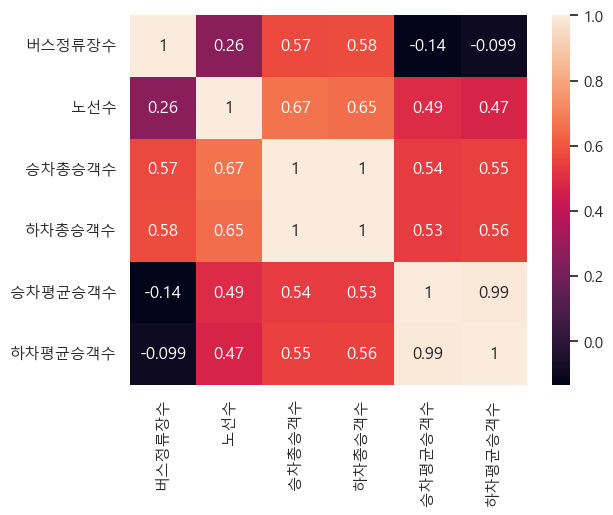

In [52]:
# 아래에 코드를 작성하고 결과를 확인합니다.
sns.heatmap(seoul_bus_station.corr(), annot=True)
plt.show()

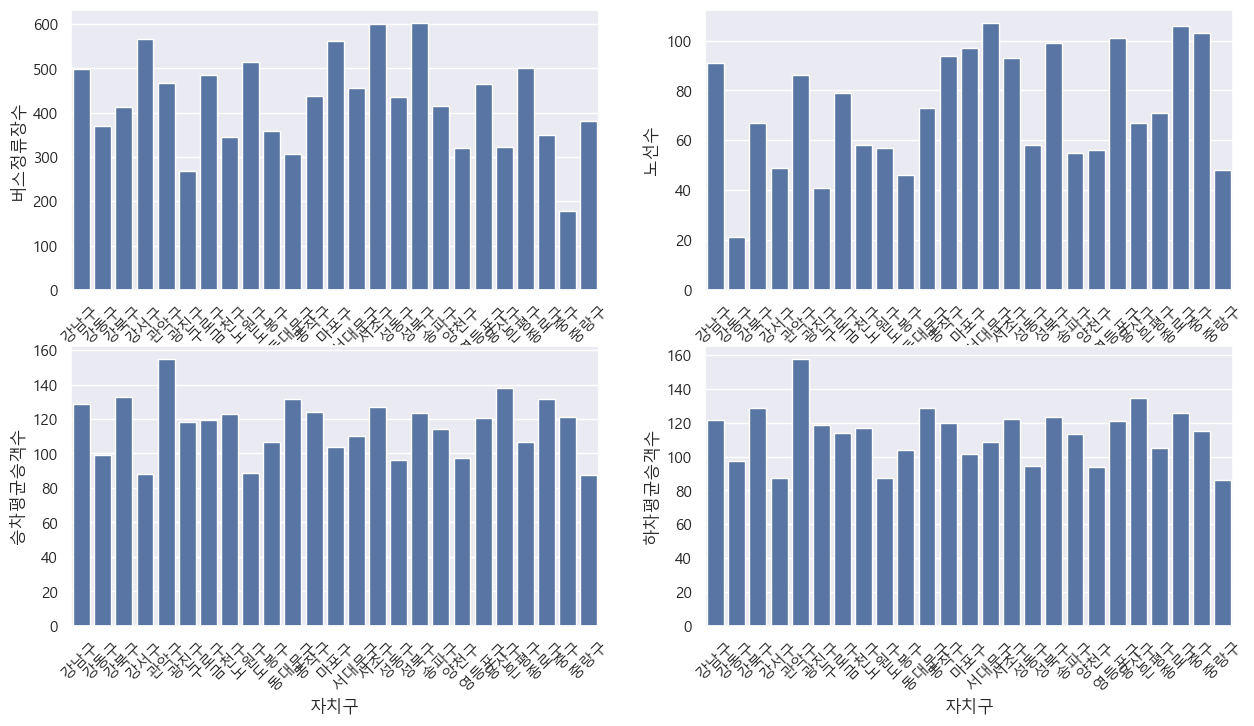

In [53]:
# 아래에 코드를 작성하고 결과를 확인합니다.
plt.figure(figsize=(15,8))

plt.subplot(2,2,1)
sns.barplot(x="자치구", y="버스정류장수", data=seoul_bus_station)
plt.xticks(rotation=45)

plt.subplot(2,2,2)
sns.barplot(x="자치구", y="노선수", data=seoul_bus_station)
plt.xticks(rotation=45)

plt.subplot(2,2,3)
sns.barplot(x="자치구", y="승차평균승객수", data=seoul_bus_station)
plt.xticks(rotation=45)

plt.subplot(2,2,4)
sns.barplot(x="자치구", y="하차평균승객수", data=seoul_bus_station)
plt.xticks(rotation=45)

plt.show()

In [54]:
# 위 차트를 통해 알게된 사실을 정리해봅시다.
# 1. 노선수와 승객수는 상관이 있다.
# 2. 버스정류장수와 승객수는 상관이 있다.
# 3. 버스정류장수와 평균승객수의 상관이 적다.

---